In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
dataset = pd.read_csv('C:\data\\udemy\Social_Network_ads.csv')

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size = 0.2,random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

y_predict = knn_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
print('confusion matrix is \n%s' % confusion_matrix(y_predict,y_test))


confusion matrix is 
[[48  3]
 [ 4 25]]


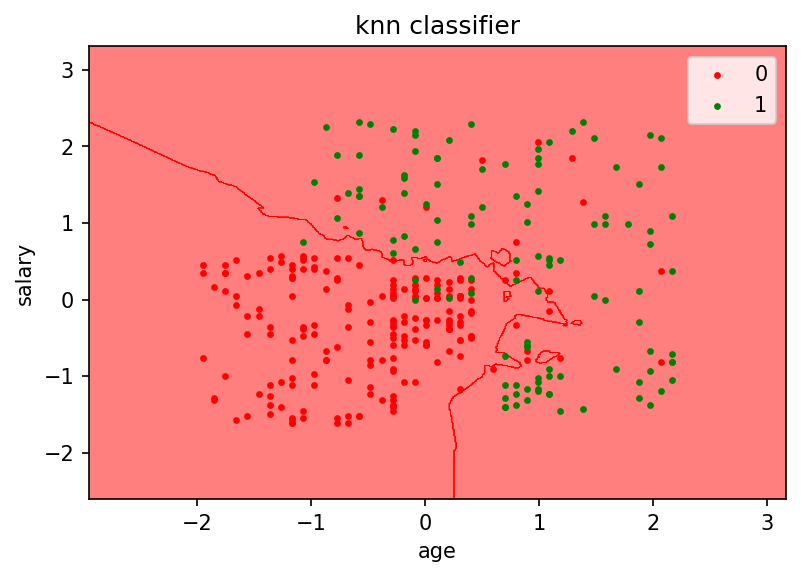

In [30]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train,y_train 

plt.figure()
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),  
                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2,  knn_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5,
             cmap = ListedColormap('red','green'))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c= ListedColormap(('red','green'))(i), label = j, s=5) 
    
plt.xlabel('age')
plt.ylabel('salary')
plt.title('knn classifier')
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()










